# Data Wrangling

This notebook imports the excel file created in the Data Access notebook and begins some cleaning and preprocessing. The end result is a cleaned csv file.

In [1]:
# import necessary packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
tweet_data = pd.read_csv('tweet_data_Feb1.csv',index_col=0,parse_dates=['created_at'])

Check that the data is loaded properly into the dataframe.

In [3]:
tweet_data.reset_index(drop=True,inplace=True)
tweet_data.head()

,screen_name,reply_to,is_quote_status,text,created_at,favorites,retweets,follower_count,entities,is_truncated,statuses_count
0,awonderland,DannyjClayton,False,@DannyjClayton Bet,2021-02-01 11:16:51,0,0,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
1,awonderland,i_am_jonjon,False,@i_am_jonjon @dmuoasl @daddydactyl @JustJasmin...,2021-02-01 06:40:46,5,0,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
2,awonderland,awonderland,False,@dmuoasl @daddydactyl @JustJasminexxx @flipsic...,2021-02-01 06:30:36,10,1,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
3,awonderland,dmuoasl,False,@dmuoasl @daddydactyl @JustJasminexxx @flipsic...,2021-02-01 06:27:03,7,1,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
4,awonderland,JustJasminexxx,False,@JustJasminexxx @flipsickle Okay,2021-02-01 06:26:47,4,1,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948


In [4]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31680 entries, 0 to 31679
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   screen_name      31680 non-null  object        
 1   reply_to         11167 non-null  object        
 2   is_quote_status  31680 non-null  bool          
 3   text             31680 non-null  object        
 4   created_at       31680 non-null  datetime64[ns]
 5   favorites        31680 non-null  int64         
 6   retweets         31680 non-null  int64         
 7   follower_count   31680 non-null  int64         
 8   entities         31680 non-null  object        
 9   is_truncated     31680 non-null  bool          
 10  statuses_count   31680 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(4), object(4)
memory usage: 2.2+ MB


Plotting favorites against retweets should show a decent linear correlation.

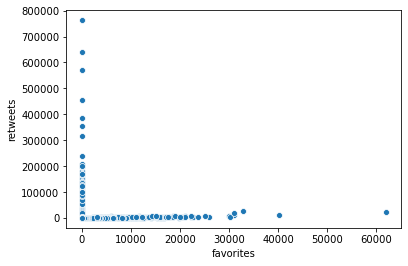

In [5]:
sns.scatterplot(data = tweet_data,x = 'favorites', y = 'retweets')

It is quite strange to see so many data points that appear to have 0 favorites, but thousands of retweets. Further investigation is required to determine the cause.

In [6]:
#Looking at data points with over 200k retweets since they are all at 0 favorites
tweet_data[tweet_data.retweets>200000].head()

,screen_name,reply_to,is_quote_status,text,created_at,favorites,retweets,follower_count,entities,is_truncated,statuses_count
16835,porterrobinson,NaN,False,RT @Skrillex: Yeah I'm EMO who fucking cares,2017-01-08 22:55:34,0,204165,678601,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,15507
23286,LouisTheChild,NaN,False,RT @sweeeetdee_: please watch. please listen c...,2020-06-01 08:06:11,0,315541,95724,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,19498
28755,JaiWolfx,NaN,False,RT @semaj_htx: WHY IS ENDING RACISM SO CONTROV...,2020-06-01 16:11:36,0,455189,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268
30282,JaiWolfx,NaN,False,RT @Kaepernick7: I appreciate you @Eminem ✊🏾 h...,2017-10-11 16:03:10,0,353323,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268
30334,JaiWolfx,NaN,False,RT @KingJames: U bum @StephenCurry30 already s...,2017-09-23 16:16:14,0,569677,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268


It looks like the tweets with 0 favorites and many retweets all start with 'RT @', meaning they are retweets. I will need to check the list of tweet texts that start with 'RT @'.

In [7]:
tweet_data[tweet_data.text.str.startswith('RT @')]

,screen_name,reply_to,is_quote_status,text,created_at,favorites,retweets,follower_count,entities,is_truncated,statuses_count
7,awonderland,NaN,True,RT @flipsickle: https://t.co/IuZDOjQGBD,2021-02-01 02:26:23,0,60,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
24,awonderland,NaN,False,RT @MasIngram: Been missing raves and I just w...,2021-01-31 03:31:51,0,125,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
34,awonderland,NaN,False,RT @SullivanKing: @awonderland Hi dad https://...,2021-01-30 03:56:45,0,42,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
45,awonderland,NaN,False,RT @ValentinoKhan: we went out into the woods ...,2021-01-29 21:04:41,0,54,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
180,awonderland,NaN,False,"RT @kalieyeetsworld: Hey @awonderland, thanks ...",2021-01-27 23:51:32,0,25,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
...,...,...,...,...,...,...,...,...,...,...,...
31659,JaiWolfx,NaN,False,RT @jonathanmvu: Just let me fall asleep in yo...,2016-05-04 16:53:32,0,4,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268
31660,JaiWolfx,NaN,False,RT @PuNx_00: Getting the feels all over again ...,2016-05-04 16:53:22,0,2,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268
31661,JaiWolfx,NaN,False,RT @53npai: THIS IS TAKING MY BREATH AWAY JFDJ...,2016-05-04 16:46:39,0,2,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268
31664,JaiWolfx,NaN,False,RT @CHAINGANGOF1974: Excited to announce my co...,2016-05-03 22:16:48,0,18,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268


In [8]:
no_rts = tweet_data.drop(index = tweet_data[tweet_data.text.str.startswith('RT @')].index)

In [9]:
no_rts

,screen_name,reply_to,is_quote_status,text,created_at,favorites,retweets,follower_count,entities,is_truncated,statuses_count
0,awonderland,DannyjClayton,False,@DannyjClayton Bet,2021-02-01 11:16:51,0,0,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
1,awonderland,i_am_jonjon,False,@i_am_jonjon @dmuoasl @daddydactyl @JustJasmin...,2021-02-01 06:40:46,5,0,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
2,awonderland,awonderland,False,@dmuoasl @daddydactyl @JustJasminexxx @flipsic...,2021-02-01 06:30:36,10,1,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
3,awonderland,dmuoasl,False,@dmuoasl @daddydactyl @JustJasminexxx @flipsic...,2021-02-01 06:27:03,7,1,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
4,awonderland,JustJasminexxx,False,@JustJasminexxx @flipsickle Okay,2021-02-01 06:26:47,4,1,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
...,...,...,...,...,...,...,...,...,...,...,...
31674,JaiWolfx,NaN,False,what happened to lil terrio,2016-04-28 23:48:40,74,29,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268
31675,JaiWolfx,JaiWolfx,False,SPRING AWAKENING 2016\n\nJune 10-12 // Chicago...,2016-04-28 19:03:15,66,10,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268
31676,JaiWolfx,NaN,False,ÎLESONIQ 2016\n\nAugust 5-6 // Montreal https:...,2016-04-28 17:45:05,35,4,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268
31678,JaiWolfx,NaN,False,nobody likes u when ur\n\nhttps://t.co/QAanYpzAIY,2016-04-27 20:21:35,54,8,59551,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,22268


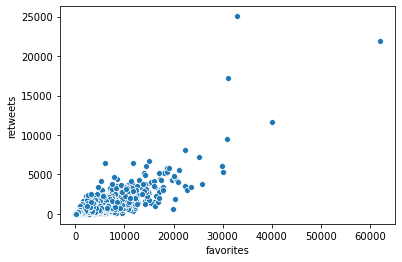

In [10]:
sns.scatterplot(data = no_rts, x='favorites',y='retweets')

That looks much more reasonable!

In [11]:
no_rts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23056 entries, 0 to 31679
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   screen_name      23056 non-null  object        
 1   reply_to         11167 non-null  object        
 2   is_quote_status  23056 non-null  bool          
 3   text             23056 non-null  object        
 4   created_at       23056 non-null  datetime64[ns]
 5   favorites        23056 non-null  int64         
 6   retweets         23056 non-null  int64         
 7   follower_count   23056 non-null  int64         
 8   entities         23056 non-null  object        
 9   is_truncated     23056 non-null  bool          
 10  statuses_count   23056 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(4), object(4)
memory usage: 1.8+ MB


Now I will remove all the tweets that are replies to other tweets. From personal experience I have seen reply tweets get a lot less views and subsequently a lot less follower engagement. This study will focus on normal tweets.

In [12]:
no_rt_no_reply = no_rts[no_rts['reply_to'].isna()]
no_rt_no_reply.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11889 entries, 9 to 31679
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   screen_name      11889 non-null  object        
 1   reply_to         0 non-null      object        
 2   is_quote_status  11889 non-null  bool          
 3   text             11889 non-null  object        
 4   created_at       11889 non-null  datetime64[ns]
 5   favorites        11889 non-null  int64         
 6   retweets         11889 non-null  int64         
 7   follower_count   11889 non-null  int64         
 8   entities         11889 non-null  object        
 9   is_truncated     11889 non-null  bool          
 10  statuses_count   11889 non-null  int64         
dtypes: bool(2), datetime64[ns](1), int64(4), object(4)
memory usage: 952.0+ KB


In [13]:
no_rt_no_reply.drop(columns = 'reply_to',inplace=True)

C:\Users\angad\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Exploring what the is_quote_status field means:

In [14]:
no_rt_no_reply[no_rt_no_reply.is_quote_status==True].head()

,screen_name,is_quote_status,text,created_at,favorites,retweets,follower_count,entities,is_truncated,statuses_count
198,awonderland,True,👀... https://t.co/9L3oealund,2021-01-26 19:24:13,1753,157,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
331,awonderland,True,yeh sex is cool but\n\nhave you ever had taco ...,2021-01-15 00:08:19,3620,210,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
379,awonderland,True,Like broooo wtf why hahaha https://t.co/y1Axwd...,2021-01-10 10:44:23,7649,361,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948
496,awonderland,True,Actually. I do stick to music. And my music br...,2020-12-29 20:01:39,2860,116,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",True,44948
514,awonderland,True,First show in ten months I have so much energy...,2020-12-26 21:38:07,1395,29,326241,"{'hashtags': [], 'symbols': [], 'user_mentions...",False,44948


After cross referencing the quote tweets with the artists twitter timeline, I can see that quote tweets appear on the timeline in the same way that regular tweets do so I will leave them in for the analysis.

How many tweets do I have left from each artist?

In [15]:
no_rt_no_reply.reset_index(drop=True,inplace=True)
no_rt_no_reply.screen_name.value_counts()

JaiWolfx          1681
wearegalantis     1594
WhatSoNot         1585
theknocks         1484
porterrobinson    1219
NGHTMRE           1099
LouisTheChild     1054
pekingduk          817
awonderland        694
sanholobeats       662
Name: screen_name, dtype: int64

Exploring the entities field to determine if it contains useful and relevant information for my analysis.

In [16]:
no_rt_no_reply.entities[0]

"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1356037847665364992, 'id_str': '1356037847665364992', 'indices': [45, 68], 'media_url': 'http://pbs.twimg.com/media/EtGdPOQUUAAVHAO.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EtGdPOQUUAAVHAO.jpg', 'url': 'https://t.co/8eUcQoRGRL', 'display_url': 'pic.twitter.com/8eUcQoRGRL', 'expanded_url': 'https://twitter.com/awonderland/status/1356037851540951041/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 548, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1125, 'h': 1395, 'resize': 'fit'}, 'medium': {'w': 968, 'h': 1200, 'resize': 'fit'}}}]}"

It looks like the entities field contains data such as whether the tweet has hashtags, mentions other users, links, pictures, etc. While these fields could be related to follower engagement, it is outside of the scope of this project. A subsequent project looking at hashtags and media inclusion can be completed at a later date. For now I will omit this column.

In [17]:
no_rt_no_reply.drop(columns = 'entities',inplace=True)

C:\Users\angad\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
no_rt_no_reply.head()

,screen_name,is_quote_status,text,created_at,favorites,retweets,follower_count,is_truncated,statuses_count
0,awonderland,False,Would you trust me with your drink be honest h...,2021-02-01 00:33:12,3917,198,326241,False,44948
1,awonderland,False,some inspiration for you https://t.co/ovatFDkZxZ,2021-01-31 20:14:43,4815,516,326241,False,44948
2,awonderland,False,if you see this tweet I am chilling &amp; so s...,2021-01-31 07:37:05,5028,223,326241,False,44948
3,awonderland,False,i want to marry my bed,2021-01-31 02:47:53,4329,927,326241,False,44948
4,awonderland,False,SOPHIE was groundbreaking and inspiring in so ...,2021-01-30 19:56:59,2323,145,326241,False,44948


Part of the project is to determine if there is an optimal day of the week to tweet. Therefore it would help to have a feature that shows what day of the week it is.

In [19]:
Day_of_Week = []
for date in no_rt_no_reply.created_at:
    Day_of_Week.append(date.weekday())
no_rt_no_reply['Day_of_Week'] = Day_of_Week

<ipython-input-19-31a7089c3c07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_rt_no_reply['Day_of_Week'] = Day_of_Week


In [20]:
no_rt_no_reply.head()

,screen_name,is_quote_status,text,created_at,favorites,retweets,follower_count,is_truncated,statuses_count,Day_of_Week
0,awonderland,False,Would you trust me with your drink be honest h...,2021-02-01 00:33:12,3917,198,326241,False,44948,0
1,awonderland,False,some inspiration for you https://t.co/ovatFDkZxZ,2021-01-31 20:14:43,4815,516,326241,False,44948,6
2,awonderland,False,if you see this tweet I am chilling &amp; so s...,2021-01-31 07:37:05,5028,223,326241,False,44948,6
3,awonderland,False,i want to marry my bed,2021-01-31 02:47:53,4329,927,326241,False,44948,6
4,awonderland,False,SOPHIE was groundbreaking and inspiring in so ...,2021-01-30 19:56:59,2323,145,326241,False,44948,5


The datetime weekday() function returns the day of the week for a datetime object with Monday = 0 and Sunday = 6

Exploration of favorites per day:

<BarContainer object of 7 artists>

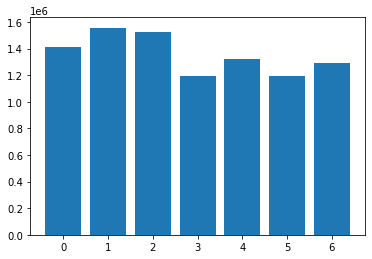

In [21]:
plt.bar(range(0,7),no_rt_no_reply.pivot(columns = 'Day_of_Week',values='favorites').sum())

In [22]:
daily_tweets = no_rt_no_reply[['Day_of_Week','favorites']].groupby(['Day_of_Week']).count().favorites
daily_faves = no_rt_no_reply[['Day_of_Week','favorites']].groupby(['Day_of_Week']).sum().favorites
daily_faves/daily_tweets

Day_of_Week
0    858.047879
1    887.246724
2    844.178393
3    659.608935
4    649.682197
5    800.593164
6    969.344569
Name: favorites, dtype: float64

In [23]:
no_rt_no_reply.to_csv('./clean_tweet_data.csv')